In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as apu
from pycraf import atm
from pycraf import conversions as cnv

total path length 1:   5.0000 km
total path length 2:   5.0000 km
refraction: -0.01156 d / 0.08651 d


ValueError: Axis limits cannot be NaN or Inf

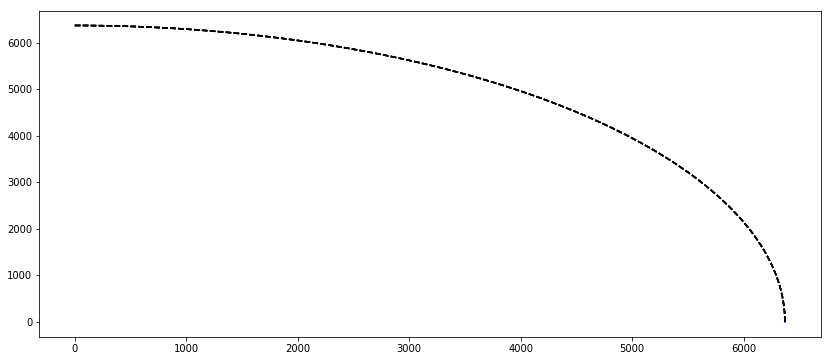

In [5]:
elevation = 0.01  # deg
obs_alt = 10.  # m
path_params_1, refraction_1, _, _ = atm.atm._prepare_path2(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )
elevation = -0.1  # degrees
obs_alt = 872.  # meters
path_params_2, refraction_2, _, _ = atm.atm._prepare_path2(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )

print('total path length 1: {:8.4f} km'.format(np.sum(path_params_1.a_n)))
print('total path length 2: {:8.4f} km'.format(np.sum(path_params_2.a_n)))
print('refraction: {:7.5f} d / {:7.5f} d'.format(refraction_1, refraction_2))


radii_1 = path_params_1.r_i
angles_1 = path_params_1.alpha_n
heights_1 = path_params_1.h_i
radii_2 = path_params_2.r_i
angles_2 = path_params_2.alpha_n
layer_angles = np.linspace(0, np.pi / 2, 91)

x1, y1 = radii_1 * np.sin(angles_1), radii_1 * np.cos(angles_1)
x2, y2 = radii_2 * np.sin(angles_2), radii_2 * np.cos(angles_2)

plt.close()
fig = plt.figure(figsize=(14, 6))
plt.plot(x1, y1, 'b-')
plt.plot(x2, y2, 'r-')
for r in np.linspace(radii_1[0], radii_1[-1], 10):
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles), 'k--', alpha=0.5)

plt.xlim((x1[0], x1[-1]))
plt.ylim((y1[0]-1, y1[-1]+1))
# plt.ylim((y1[0], y2[0]+1e-3))
# plt.xlim((x1[0], 1.2))
# plt.ylim((y2[0]-0.23, y2[0]+0.01))
# plt.xlim((x1[0], 0.01))
# plt.ylim((y1[0]-0.0001, y1[0]+0.001))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Distance to Earth center (km)')
# plt.gca().set_aspect('equal')
plt.show()




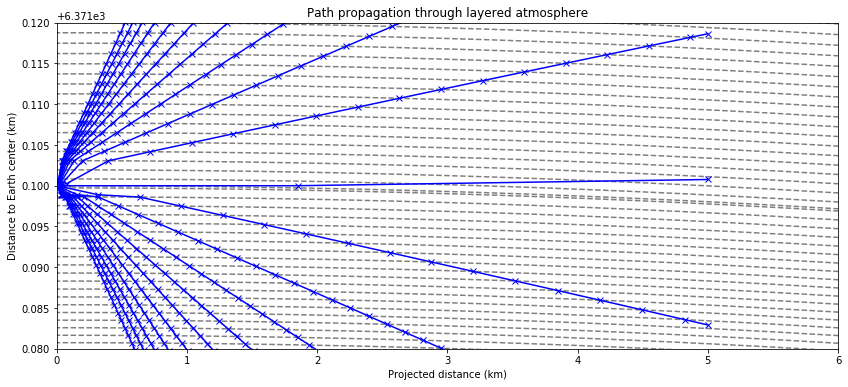

In [19]:
obs_alt = 100.
earth_radius = 6371.
layer_angles = np.linspace(-0.001, 0.02, 361)

deltas = 0.0001 * np.exp(np.arange(900) / 100.)
heights = np.cumsum(np.hstack([0., deltas]))
if obs_alt > 1.e-3:
    obs_idx = np.searchsorted(heights, obs_alt / 1000.)
    heights = np.hstack([
        heights[:obs_idx],
        obs_alt / 1000.,
        heights[obs_idx:]
        ])

plt.close()
fig = plt.figure(figsize=(14, 6))
for r in earth_radius + heights:
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles), 'k--', alpha=0.5)

for elevation in np.linspace(-2, 2, 21):
    path_params, _, _, _ = atm.atm._prepare_path2(
        elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
        )
    radii = path_params.r_i
    angles = path_params.delta_n
    x, y = radii * np.sin(angles), radii * np.cos(angles)

    plt.plot(x, y, 'bx-')


plt.xlim((0, 6))
plt.ylim((earth_radius + (obs_alt - 20) / 1000, earth_radius + (obs_alt + 20) / 1000))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Distance to Earth center (km)')
# plt.gca().set_aspect('equal')
plt.show()


In [17]:
radii

array([6371.1       , 6371.10026856, 6371.10307174, 6371.10420763,
       6371.10535493, 6371.10651377, 6371.10768425, 6371.10886649,
       6371.11006062, 6371.11126675, 6371.112485  , 6371.11371549,
       6371.11495835, 6371.1162137 , 6371.11748167, 6371.11876238,
       6371.12005596, 6371.12136254, 6371.12268225, 6371.12401523,
       6371.12536161, 6371.12672151, 6371.12809508, 6371.12948246,
       6371.13088378, 6371.13229918, 6371.13372881, 6371.13517281,
       6371.13663132, 6371.13810449, 6371.13959246, 6371.14109539,
       6371.14261342, 6371.14414671, 6371.14569541, 6371.14725967,
       6371.14883965, 6371.15043552, 6371.15204742, 6371.15367552,
       6371.15531999, 6371.15698098, 6371.15865866, 6371.16035321,
       6371.16206479, 6371.16379356, 6371.16553972, 6371.16730342,
       6371.16908485, 6371.17088418, 6371.17270159, 6371.17453727,
       6371.1763914 , 6371.17826416, 6371.18015575, 6371.18206634,
       6371.18399614, 6371.18594533, 6371.18791411, 6371.18990

In [16]:
angles

array([       nan, 1.53588853, 1.53588471, 1.53588084, 1.53587694,
       1.535873  , 1.53586902, 1.53586499, 1.53586093, 1.53585683,
       1.53585269, 1.5358485 , 1.53584428, 1.53584001, 1.5358357 ,
       1.53583134, 1.53582695, 1.53582251, 1.53581802, 1.53581349,
       1.53580891, 1.53580429, 1.53579962, 1.53579491, 1.53579015,
       1.53578534, 1.53578048, 1.53577558, 1.53577063, 1.53576562,
       1.53576057, 1.53575547, 1.53575031, 1.53574511, 1.53573985,
       1.53573454, 1.53572918, 1.53572376, 1.53571829, 1.53571276,
       1.53570718, 1.53570155, 1.53569586, 1.53569011, 1.5356843 ,
       1.53567844, 1.53567252, 1.53566654, 1.5356605 , 1.5356544 ,
       1.53564824, 1.53564201, 1.53563573, 1.53562938, 1.53562297,
       1.5356165 , 1.53560996, 1.53560336, 1.53559669, 1.53558995,
       1.53558315, 1.53557628, 1.53556934, 1.53556234, 1.53555526,
       1.53554811, 1.5355409 , 1.53553361, 1.53552624, 1.53551881,
       1.5355113 , 1.53550372, 1.53549606, 1.53548832, 1.53548

In [18]:
x, y

(array([          nan, 6367.21889802, 6367.22084861, 6367.22112434,
        6367.22140279, 6367.22168399, 6367.22196797, 6367.22225476,
        6367.22254438, 6367.22283687, 6367.22313225, 6367.22343054,
        6367.22373178, 6367.22403599, 6367.22434321, 6367.22465346,
        6367.22496678, 6367.22528318, 6367.22560271, 6367.22592539,
        6367.22625125, 6367.22658033, 6367.22691265, 6367.22724824,
        6367.22758715, 6367.22792939, 6367.22827501, 6367.22862402,
        6367.22897648, 6367.22933241, 6367.22969184, 6367.23005481,
        6367.23042135, 6367.23079149, 6367.23116528, 6367.23154274,
        6367.23192391, 6367.23230883, 6367.23269754, 6367.23309006,
        6367.23348644, 6367.23388671, 6367.23429091, 6367.23469908,
        6367.23511125, 6367.23552747, 6367.23594778, 6367.2363722 ,
        6367.23680079, 6367.23723358, 6367.23767061, 6367.23811192,
        6367.23855755, 6367.23900755, 6367.23946196, 6367.23992081,
        6367.24038416, 6367.24085203, 6367.24132